In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('data.csv')

In [3]:
df = df.drop(['beats'], axis=1)

In [4]:
df.head()

,class_name,tempo,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues,103.359375,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues,95.703125,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues,151.999081,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843070,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues,184.570312,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues,161.499023,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


# Preprocesing

In [5]:
df['class_name'].unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [6]:
df['class_name'] = df['class_name'].astype('category')
df['class_label'] = df['class_name'].cat.codes

In [7]:
lookup_genre_name = dict(zip(df.class_label.unique(), df.class_name.unique()))   
lookup_genre_name

{0: 'blues',
 1: 'classical',
 2: 'country',
 3: 'disco',
 4: 'hiphop',
 5: 'jazz',
 6: 'metal',
 7: 'pop',
 8: 'reggae',
 9: 'rock'}

In [8]:
df['class_name'].unique()

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
Categories (10, object): ['blues', 'classical', 'country', 'disco', ..., 'metal', 'pop', 'reggae', 'rock']

In [9]:
cols = list(df.columns)
cols.remove('label')
cols.remove('class_label')
cols.remove('class_name')
#df[cols]

# Data Splitting for Training and Testing

In [10]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,1:28]
y = df['class_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

# Feature importance using Random Forest

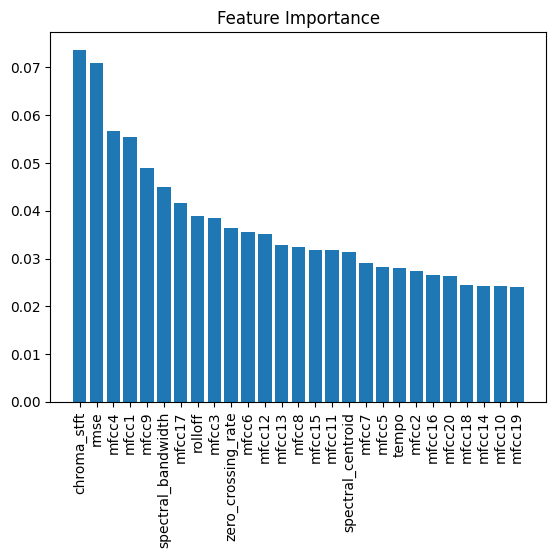

In [12]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
clf = RandomForestClassifier(random_state=0, n_jobs=-1).fit(X_train, y_train)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns.values[i] for i in indices]
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

# Random Forest Classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=410, max_depth=50, min_samples_split=2,
                             min_samples_leaf=1, random_state=42)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.692

# Fetching File Metadata For Prediction

In [15]:
from predictor.Metadata import getmetadata
a = getmetadata("2.wav")

d:\Music Genre detection\Music-Genre-Classification-Django\predictor\Metadata.py:10: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)


# Predicting using Random Forest classifier

In [16]:
d1 =np.array(a)
genre_prediction = rfc.predict([d1])
print(lookup_genre_name[genre_prediction[0]])

hiphop


d:\Music Genre detection\myenv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [17]:
import pickle
pick1 = {
    'knn':rfc,
    'lgn':lookup_genre_name
}
pickle.dump( pick1, open( 'models' + ".p", "wb" ) )